Perceptron is a single layer neural network. It is used as a binary classifier. The figure below shows the architecture of a perceptron.

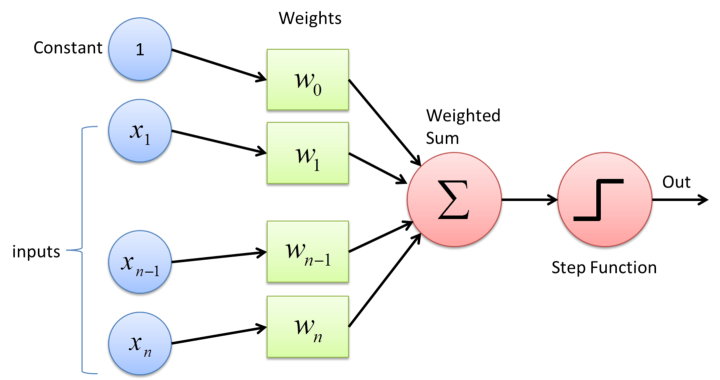

Multi-layer perception is also known as MLP. It is fully connected dense layers, which transform any input dimension to the desired dimension. A multi-layer perception is a neural network that has multiple layers. To create a neural network we combine neurons together so that the outputs of some neurons are inputs of other neurons.
A multi-layer perceptron has one input layer and for each input, there is one neuron(or node), it has one output layer with a single node for each output and it can have any number of hidden layers and each hidden layer can have any number of nodes. A schematic diagram of a Multi-Layer Perceptron (MLP) is depicted below.

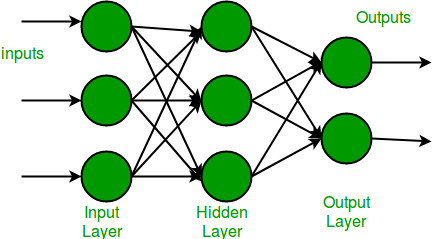

In [ ]:
import tensorflow as tf
import numpy as np

Forming the dataset

In [ ]:
x_a = np.random.rand(100, 1)+0.1
x_b = -1*np.random.rand(100, 1)-0.1
x_c = -1*np.random.rand(100, 1)-0.1
x_d = np.random.rand(100, 1)+0.1
y_a = np.random.rand(100, 1)+0.1
y_b = np.random.rand(100, 1)+0.1
y_c = -1*np.random.rand(100, 1)-0.1
y_d = -1*np.random.rand(100, 1)-0.1
y_1 = np.ones((100, 1))
y_2 = 2*np.ones((100, 1))
y_3 = 3*np.ones((100, 1))
y_4 = 4*np.ones((100, 1))

In [ ]:
x1 = np.concatenate((x_a, x_b, x_c, x_d))
x2 = np.concatenate((y_a, y_b, y_c, y_d))
t = np.concatenate((y_1, y_2, y_3, y_4))

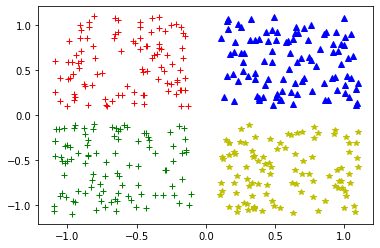

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_a, y_a, 'b^')
plt.plot(x_b, y_b, 'r+')
plt.plot(x_c, y_c, 'g+')
plt.plot(x_d, y_d, 'y*')

One hot encoding the targets

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
one_hot.fit(t)
t_1 = one_hot.transform(t)

In [ ]:
print(t_1.toarray())

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
t_1 = t_1.toarray()

In [ ]:
X = np.c_[x1, x2]
y = t_1

Dividing the dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model with one hidden layer and 5 neuron units

In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(units=5, activation='sigmoid'),
    keras.layers.Dense(units=4, activation='softmax'),
])
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=500)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_1_hot = model.predict(X_test)

In [ ]:
y_pred = [[y_pred_1_hot[i].argmax()+1] for i in range(len(y_pred_1_hot))]

In [ ]:
y_test_class = [[y_test[i].argmax()+1] for i in range(len(y_test))]

In [ ]:
confusion_matrix(y_test_class, y_pred)

array([[34,  1,  0,  2],
       [ 0, 25,  0,  0],
       [ 0,  0, 29,  1],
       [ 0,  0,  0, 28]])

In [ ]:
X = np.c_[x1, x2]
y = t
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
# Predict the function value for the whole gid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([[Z[i].argmax()+1] for i in range(len(Z))])
Z = Z.reshape(xx.shape)

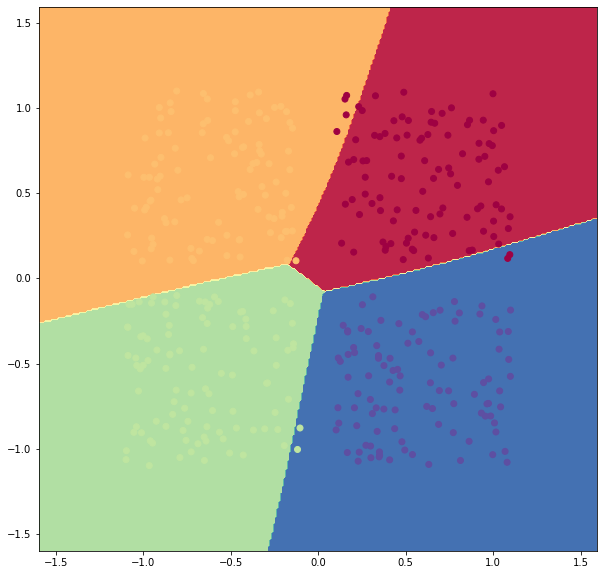

In [ ]:
# Plot the contour and training examples
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Model with two hidden layers and 5 neurons in each

In [ ]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(units=5, activation='sigmoid'),
    keras.layers.Dense(units=5, activation='sigmoid'),
    keras.layers.Dense(units=4, activation='softmax'),
])
model1.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model1.fit(X_train, y_train, epochs=2000)

In [ ]:
y_pred_1_hot = model1.predict(X_test)
y_pred1 = [[y_pred_1_hot[i].argmax()+1] for i in range(len(y_pred_1_hot))]
confusion_matrix(y_test_class, y_pred1)

array([[37,  0,  0,  0],
       [ 0, 25,  0,  0],
       [ 0,  0, 30,  0],
       [ 0,  0,  0, 28]])

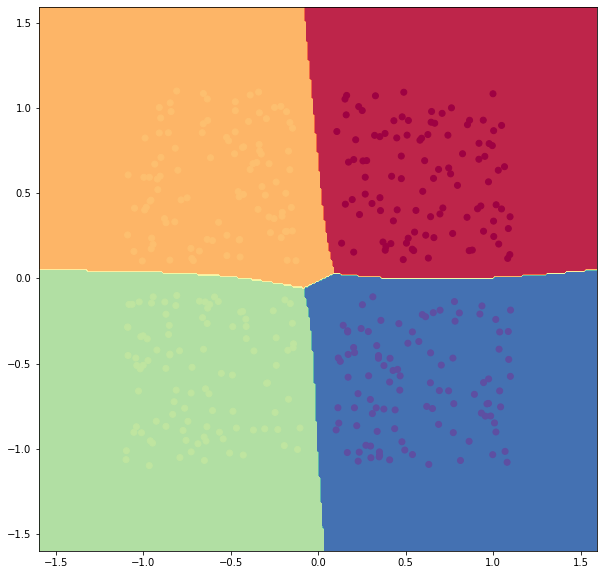

In [ ]:
# Predict the function value for the whole gid
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([[Z[i].argmax()+1] for i in range(len(Z))])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Conclusion


*   In the first model with hidden layer and 5 neurons, we see that there is some misclassification, as seen from the confusion matrix. This is because the model is too simple for the problem.
* In the second model, we see that the model perfectly classifies all instances, the decision boundary is more sharp. The increase in number of hidden layers causes more abstraction in the higher layers, as lower layers model low level or basic features and gives them as output to the higher layers.
* The increase in the number of hidden layers does not provide that significant increase in accuracy.
